# name: Marco Giunta
## Rlab05

In [21]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Exercise 1: newspaper inference
**Introduction**
In order to apply Bayes' theorem to this problem we first need to setup a generative model for the data. Notice that each person either reads the journal or doesn't; if we suppose that for any given person the former happens with probability $p$ then this process can be modelled as a Bernoulli trial.

**a)** Due to the above if we sample a population of multiple people the process as a whole can be modelled with a *binomial* distribution - parametrized by an unknown value of $p$.   

**b)** Bayes' theorem states that:
\begin{equation}
  \text{posterior} = \frac{\text{likelihood}\times\text{prior}}{\text{evidence}}
\end{equation}
The denominator is just a constant normalization factor; if we assume a uniform prior then the prior itself equals a constant, too. This means that in our case
\begin{equation}
  \text{posterior} \propto \text{likelihood}
\end{equation}
i.e. the posterior and the likelihood are the same function up to a change of scale needed to normalize the area.       

**c)** The above points imply that the likelihood is $\text{Binom}(k = 29, n = 150; p)$ - where $n$ and $k$ are fixed by the data, whereas $p$ is the only true (continuous) variable and target of the inference. Of course $p \in [0,1]$; hence to normalize the likelihood wrt $p$ we need to integrate over $I=[0,1]$ i.e.
\begin{equation}
  \text{posterior} = \frac{\text{Binom}(k=29,n=150;p)}{\int_0^1 \text{Binom}(k=29,n=150;p)\mathrm{d}p}
\end{equation}

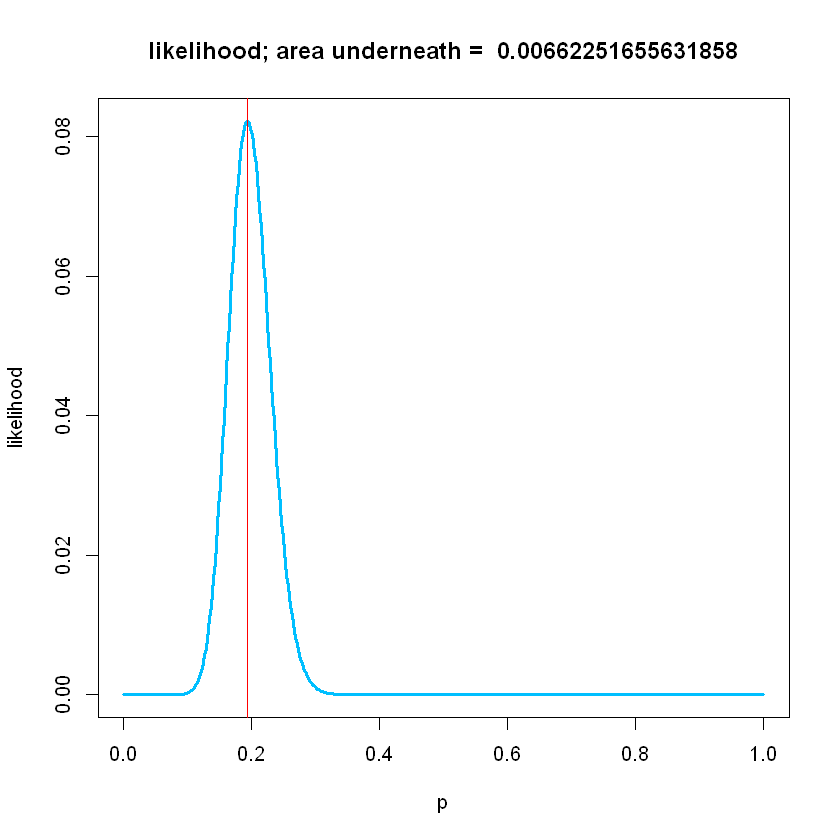

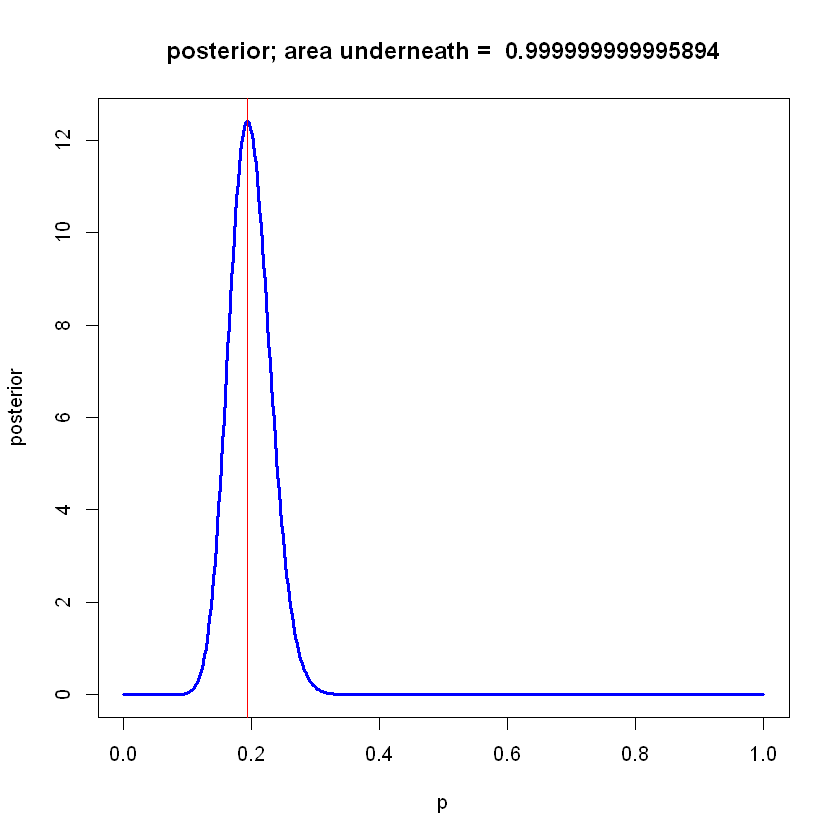

In [40]:
likelihood <- function(p) dbinom(x = 29, size = 150, prob = p) # explicit but equivalent function definition: function(p) p^29*(1-p)^(150-29) * choose(150,29)

posterior <- function(p) likelihood(p)/integrate(likelihood, lower = 0, upper = 1)$value

p.vector <- seq(0, 1, length.out = 500)

plot(p.vector, likelihood(p.vector), type = "l", lwd = 3, col = "deepskyblue", xlab = "p", ylab = "likelihood", main = paste("likelihood; area underneath = ",integrate(likelihood, 0, 1)$value))
abline(v = 29/150, col = "red")
#lines(p.vector, posterior(p.vector), lwd = 3, col = "blue")
plot(p.vector, posterior(p.vector), type = "l", lwd = 3, col = "blue", xlab = "p", ylab = "posterior", main = paste("posterior; area underneath = ", integrate(posterior, 0, 1)$value))
abline(v = 29/150, col = "red")

#df <- data.frame(p.vector, likelihood(p.vector), posterior(p.vector))
#names(df) <- c("p", "likelihood", "posterior")
#g <- ggplot(data = df) + geom_line(aes(x = p, y = likelihood)) + geom_line(aes(x = p, y = posterior))
#g

Notice that the mode is exactly at $29/150$. This makes sense: in absence of any pre-existing information (we picked a uniform prior) our best "intuitive" estimate for $p$ coming from the data should be $29/150$.

# Exercise 2: concert hall inference

# Exercise 3: coin flip inference
**Introduction**
A coin is flipped $n=30$ times with the following outcomes:
\begin{equation}
  \text{T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H}
\end{equation}
which I converted to an R-intelligible format using [this python script](https://github.com/marco-giunta/AdvStatPhysAn/blob/main/coin_flip.py) since I'm too lazy to do it myself.        
*Generative model*: we assume a single coin flip is a Bernoulli trial parametrized by an unknown probability $p$; if we flip the coin $n\geq 2$ times then the same holds but with a binomial distribution instead. We therefore apply Bayes' theorem to infer the value of $p \in [0,1]$ given an appropriate prior and the data seen above.            

**a)** In order to compute the posterior we apply Bayes' theorem as already done many times; the only difference is the following.    
We already showed that likelihood = binomial; exactly as in exercise 1 if prior = uniform then the posterior will equal the likelihood up to a normalization constant factor - which means the inference is trivial! We simply need to set posterior = normalized Binomial wrt p.       
What if we use a beta prior? Then since we know that the beta distribution is the conjugate prior of the binomial distribution we obtain posterior = beta with slightly different parameters; once again no explicit computation is actually needed.

In [ ]:
# With more complex priors we would define something like:

compute.posterior <- function(likelihood, prior) {
    numerator <- function(p) likelihood(p)*prior(p)
    denominator <- integrate(numerator, 0, 1)$value
    posterior <- function(p) numerator(p)/denominator
    return (posterior)
}
# and then use:
uniform.prior <- function(p) return (1) # f(p)=1 defined over [0,1] is already normalized
# and so on; with a uniform/beta priors, though, we know beforehand the analytic expression of the posterior
# hence no explicit computation is needed

In [2]:
coin.flips <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")
print(paste("number of heads: ", sum(coin.flips == "H")))
print(paste("number of tails: ", sum(coin.flips == "T")))
# since we have as many heads as tails over a relatively large number of samples (30) we intuitively suspect the coin is fair; we can make this more rigorous using inference

[1] "number of heads:  15"
[1] "number of tails:  15"


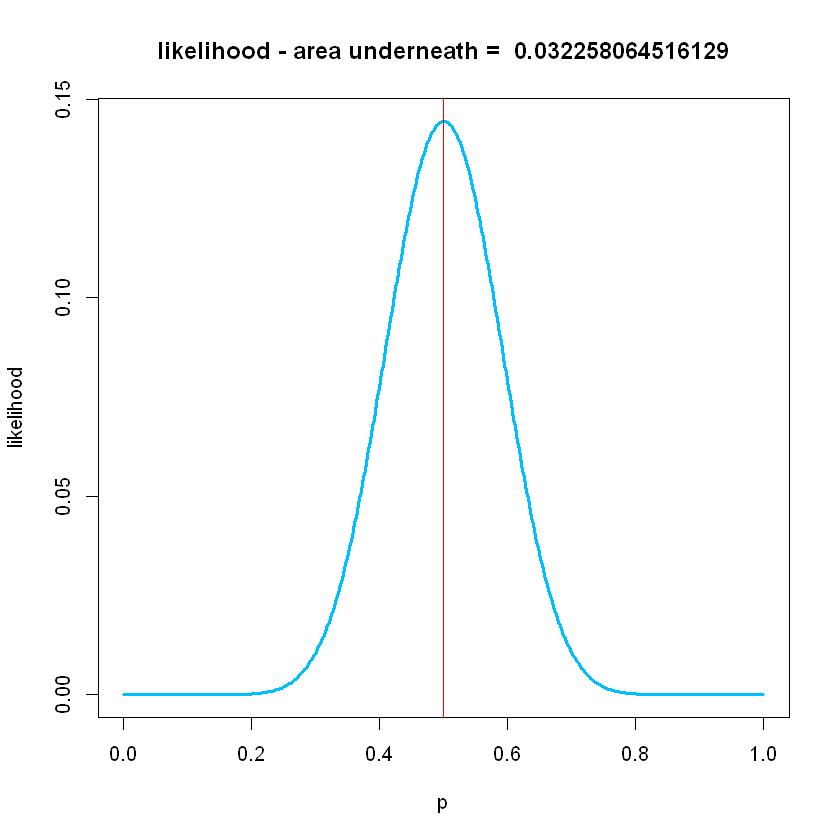

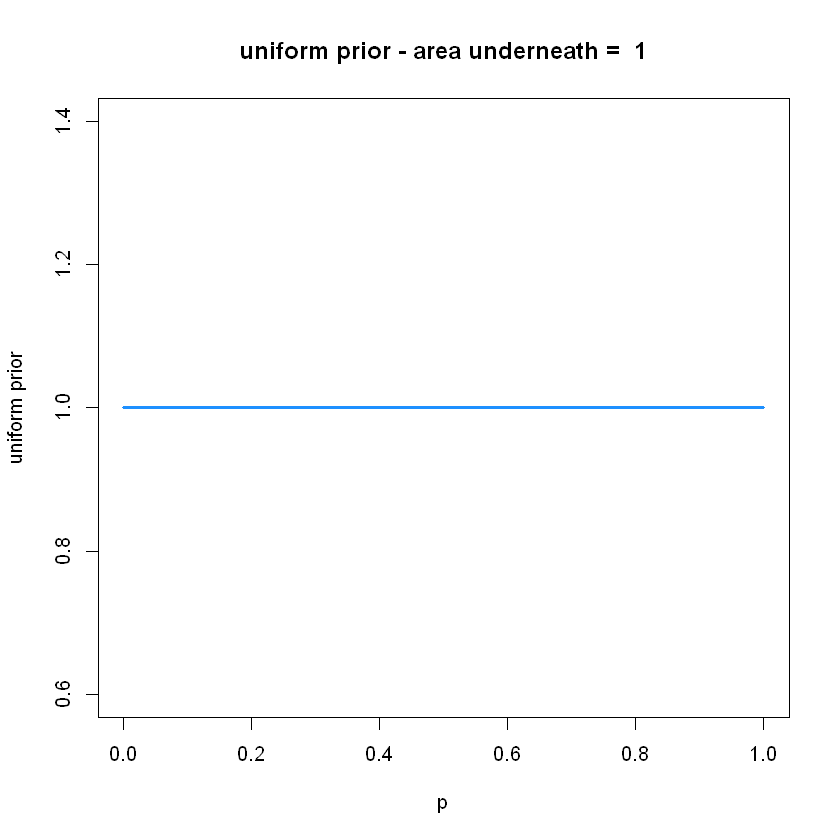

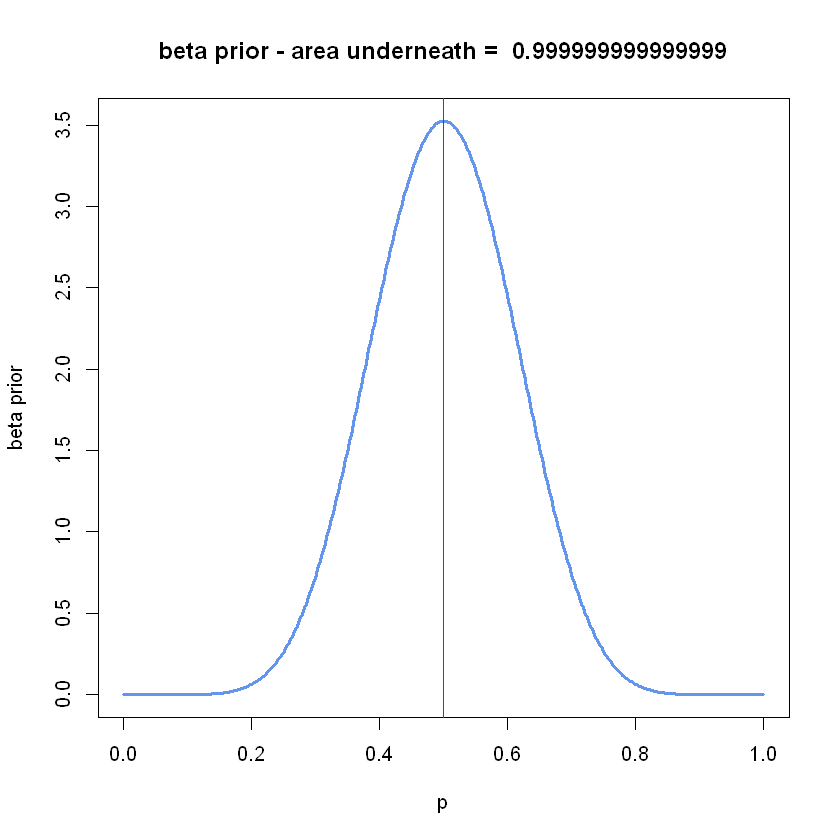

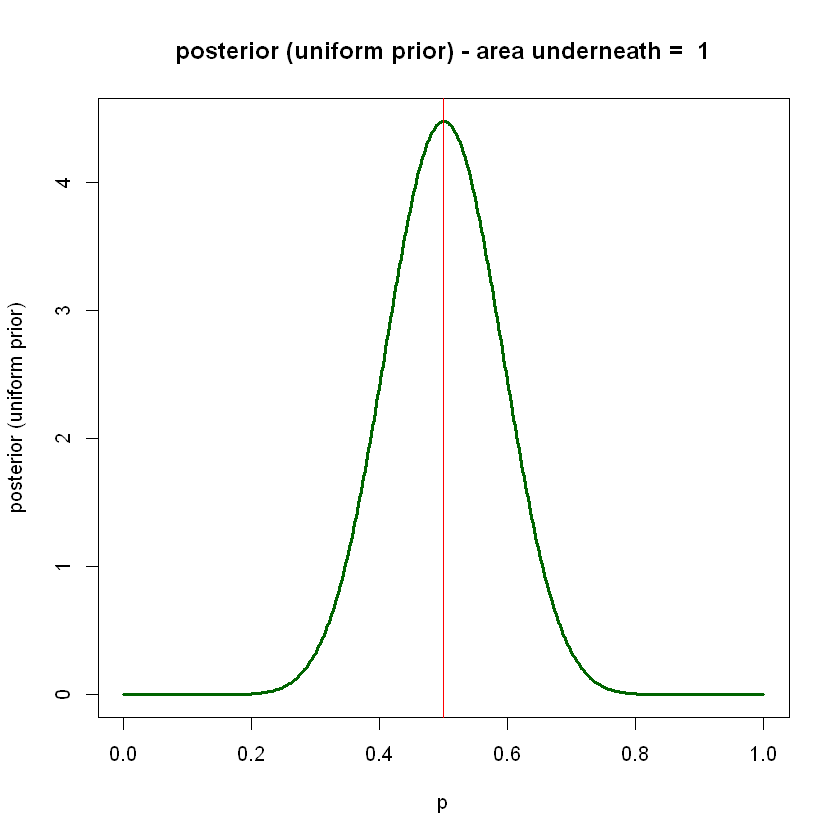

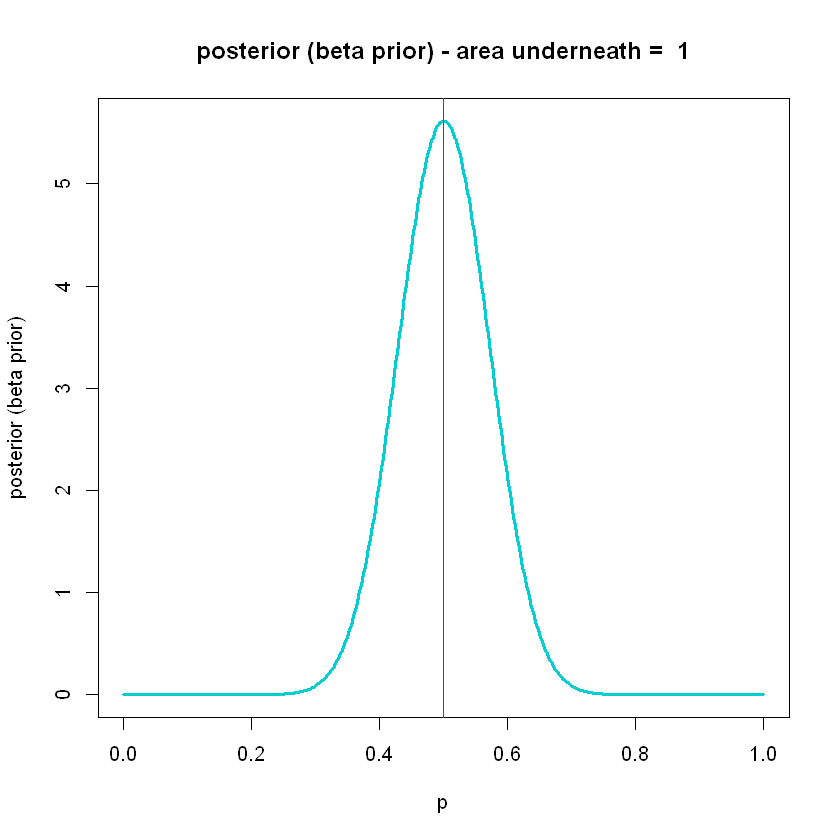

In [1]:
n.successes <- 15; n.attempts <- 30
ap <- 10; bp <- ap

likelihood        <- function(p) dbinom(x = n.successes, size = n.attempts, prob = p) # let's say p is the probability of obtaining heads; then during the experiment we obtained 15/30 successes.
uniform.prior     <- function(p) rep(1, times = length(p)) # f(p)=1 defined over [0,1] is already normalized
beta.prior        <- function(p) dbeta(p, shape1 = ap, shape2 = bp) # let's say we strongly believe the coin is fair. Then we can use a narrow beta prior (large alpha) peaked around p=0.5 (alpha=beta)
uniform.posterior <- function(p) likelihood(p)/integrate(likelihood, 0, 1)$value
beta.posterior    <- function(p) dbeta(p, shape1 = (ap + n.successes), shape2 = (bp + (n.attempts - n.successes))) # binom likelihood + beta prior --> beta posterior with alpha = old.alpha + n.suc, beta  olb.beta + n.at - n.suc

# helper plot function
plot.function <- function(x, f, color, name, separate.plot = TRUE) {
    if (separate.plot) plot(x, f(x), type = "l", lwd = 3, col = color, xlab = "p", ylab = name, main = paste(name,"- area underneath = ",integrate(f, 0, 1)$value))
    else lines(x, f(x), type = "l", lwd = 3, col = color, xlab = "p", ylab = name, main = paste(name,"- area underneath = ",integrate(f, 0, 1)$value))
}

p.vector <- seq(0, 1, length.out = 500)

plot.function(p.vector, likelihood, "deepskyblue", "likelihood"); abline(v = 0.5, col = "red") # it's an intuitive result: we obtained 15/30 successes and the likelihood is max. at p = 0.5
plot.function(p.vector, uniform.prior, "dodgerblue", "uniform prior")
plot.function(p.vector, beta.prior, "cornflowerblue", "beta prior"); abline(v = 0.5, col = "red")
plot.function(p.vector, uniform.posterior, "darkgreen", "posterior (uniform prior)"); abline(v = 0.5, col = "red") # same shape as the likelihood, of course. Weak prior --> the likelihood dominates (i.e. the data do)
plot.function(p.vector, beta.posterior, "darkturquoise", "posterior (beta prior)"); abline(v = 0.5, col = "red") # still peaked around 0.5: this is inevitable, since both the prior and the data are too

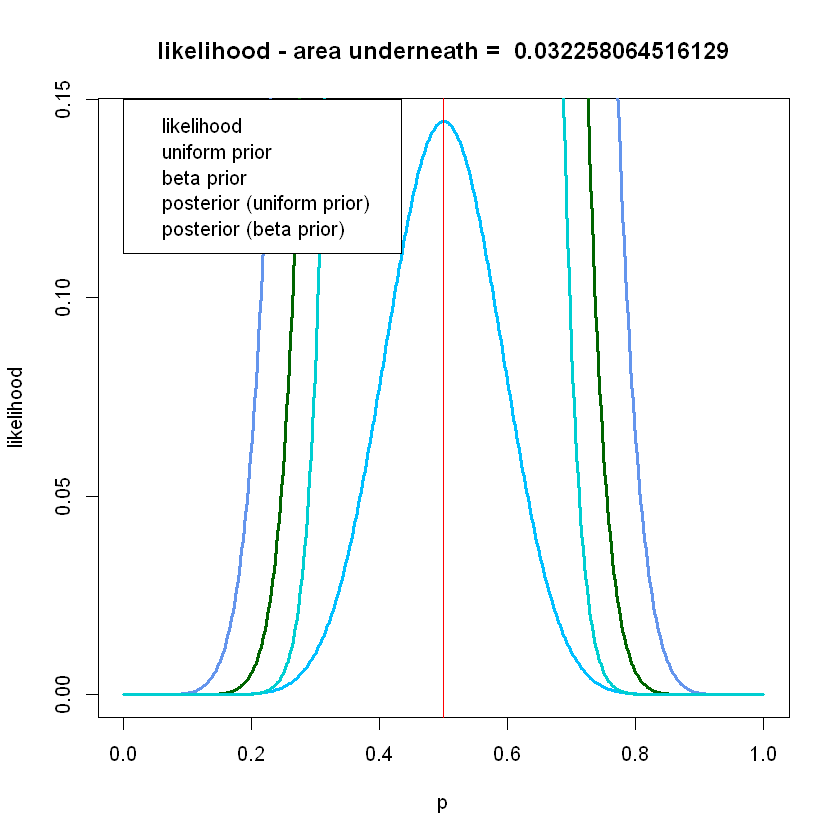

In [37]:
# we now plot all curves in the same graph to compare them
plot.function(p.vector, likelihood, "deepskyblue", "likelihood"); abline(v = 0.5, col = "red")

func.list <- list(uniform.prior, beta.prior, uniform.posterior, beta.posterior); col.list <- list("dodgerblue", "cornflowerblue", "darkgreen", "darkturquoise"); names.list <- list("uniform prior", "beta prior", "posterior (uniform prior)", "posterior (beta prior)")

#pmap(func.list, col.list, names.list, plot.function, separate.plot = FALSE) # doesn't work, unfortunately
for (i in 1:4) plot.function(p.vector, func.list[[i]], col.list[[i]], names.list[[i]], separate.plot = FALSE)
legend(x = 0, y = 0.15, legend = c("likelihood", unlist(names.list)), col = c("deepskyblue", unlist(col.list)))

**b)** If we only cared about the region near the mode we could use the gaussian approximation as an estimate for the two values $a, b$ such that $\int_a^b \text{posterior} = \text{desired value}$. For example we derived the general equation
\begin{equation}
  a,b = p_0 \pm 2\sigma \quad \text{where $p_0$ = mode of posterior and } \sigma = \sqrt{-\frac{\mathrm{d}^2 \ln \text{posterior}}{\mathrm{d} p^2}|_{p_0}}
\end{equation}
(cfr page 8 of stat06.pdf)     
which in the case of a beta prior/posterior becomes (cfr page 9):
\begin{equation}
  \sigma = \frac{1}{\alpha + \beta + n - 2} \sqrt{\frac{\alpha + r - 1}{\alpha + r}}
\end{equation}
where $\alpha, \beta$ are the prior's parameters, and $r,n$ are successes and attempts respectively.   

Unfortunately for a large interval this approximation breaks down; a simpler approach is then to simply inspect the plot and "guess" which integration extrema to use.

In [2]:
compute.sigma.from.beta.dist <- function(alpha, beta, r, n) 1/(alpha + beta + n - 2)*sqrt((alpha + r - 1)/(alpha + r))

sigma.beta.prior <- compute.sigma.from.beta.dist(alpha = ap, beta = bp, r = n.successes, n = n.attempts)
print(sigma.beta.prior)
k <- 7
integrate(beta.posterior, (0.5-k*sigma.beta.prior), (0.5+k*sigma.beta.prior))$value

[1] 0.02041241


[1] 0.9599948

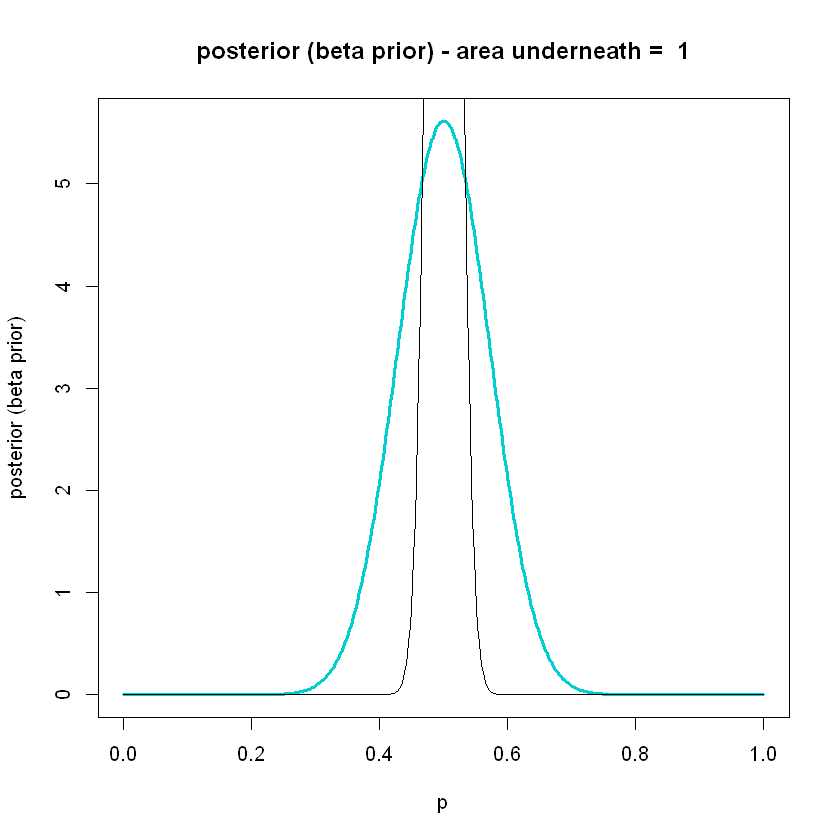

In [3]:
plot.function(p.vector, beta.posterior, "darkturquoise", "posterior (beta prior)")
lines(p.vector, dnorm(p.vector, mean = 0.5, sd = sigma.beta.prior)) # the gaussian approximation clearly doesn't work for our purposes

[1] "integral between  0.36 and 0.64 = 0.955615155284447"
[1] "integral between  0.2 and 0.8 = 0.9999974127351"
[1] "integral between  0.425 and 0.574 = 0.708212301526372"


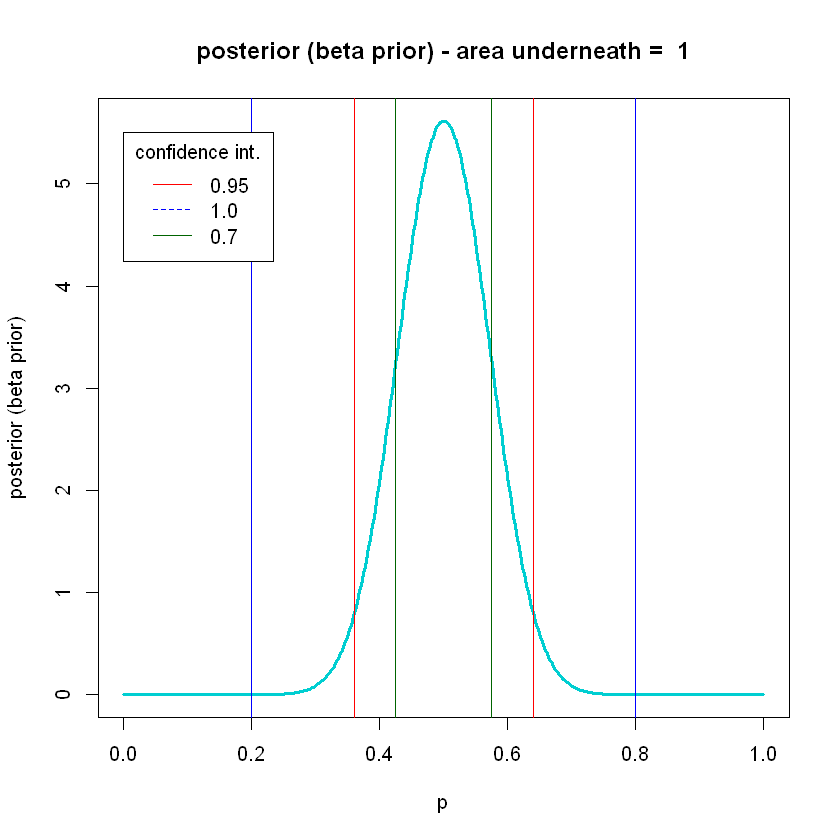

In [77]:
x1.95 <- 0.36; x2.95 <- 0.64
print(paste("integral between ", x1.95, "and", x2.95, "=", integrate(beta.posterior, x1.95, x2.95)$value))

x1.100 <- 0.2; x2.100 <- 0.8
print(paste("integral between ", x1.100, "and", x2.100, "=", integrate(beta.posterior, x1.100, x2.100)$value))

x1.70 <- 0.425; x2.70 <- 0.574
print(paste("integral between ", x1.70, "and", x2.70, "=", integrate(beta.posterior, x1.70, x2.70)$value))

plot.function(p.vector, beta.posterior, "darkturquoise", "posterior (beta prior)"); abline(v = x1.95, col = "red"); abline(v = x2.95, col = "red")
abline(v = x1.100, col = "blue"); abline(v = x2.100, col = "blue")
abline(v = x1.70, col = "darkgreen"); abline(v = x2.70, col = "darkgreen")
legend(x = 0, y = 5.5, legend = c("0.95", "1.0", "0.7"), col = c("red", "blue", "darkgreen"), lty=1:2, title = "confidence int.")